# EDA và Trực quan hóa dữ liệu Amazon Sale Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('Amazon_SaleData_Cleaned.csv')
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Tạo các biến phụ trợ
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['TotalAmount'] = (df['UnitPrice'] * df['Quantity'] * (1 - df['Discount'])) + df['Tax'] + df['ShippingCost']

df.head()

,Quantity,UnitPrice,Discount,Tax,ShippingCost,Category,Brand,PaymentMethod,OrderStatus,OrderDate,Country,Year,Month,TotalAmount
0,3,106.59,0.00,0.00,0.09,Books,Brightlux,Debit Card,Delivered,2023-01-31,India,2023,1,319.8600
1,1,251.37,0.05,19.10,1.74,Home & Kitchen,Urbanstyle,Amazon Pay,Delivered,2023-12-30,United States,2023,12,259.6415
2,3,35.03,0.10,7.57,5.91,Clothing,Urbanstyle,Debit Card,Delivered,2022-05-10,United States,2022,5,108.0610
3,5,33.58,0.15,11.42,5.53,Home & Kitchen,Zenith,Cash On Delivery,Delivered,2023-07-18,India,2023,7,159.6650
4,2,515.64,0.25,38.67,9.23,Clothing,Kiddofun,Credit Card,Cancelled,2023-02-04,Canada,2023,2,821.3600


### 1. Phân tích phân phối của các biến số để hiểu đặc điểm dữ liệu và phát hiện các pattern bất thường.



In [3]:
numeric_cols = ['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount']
df[numeric_cols].describe()

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256500
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.269000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.889750
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.316000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.764000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


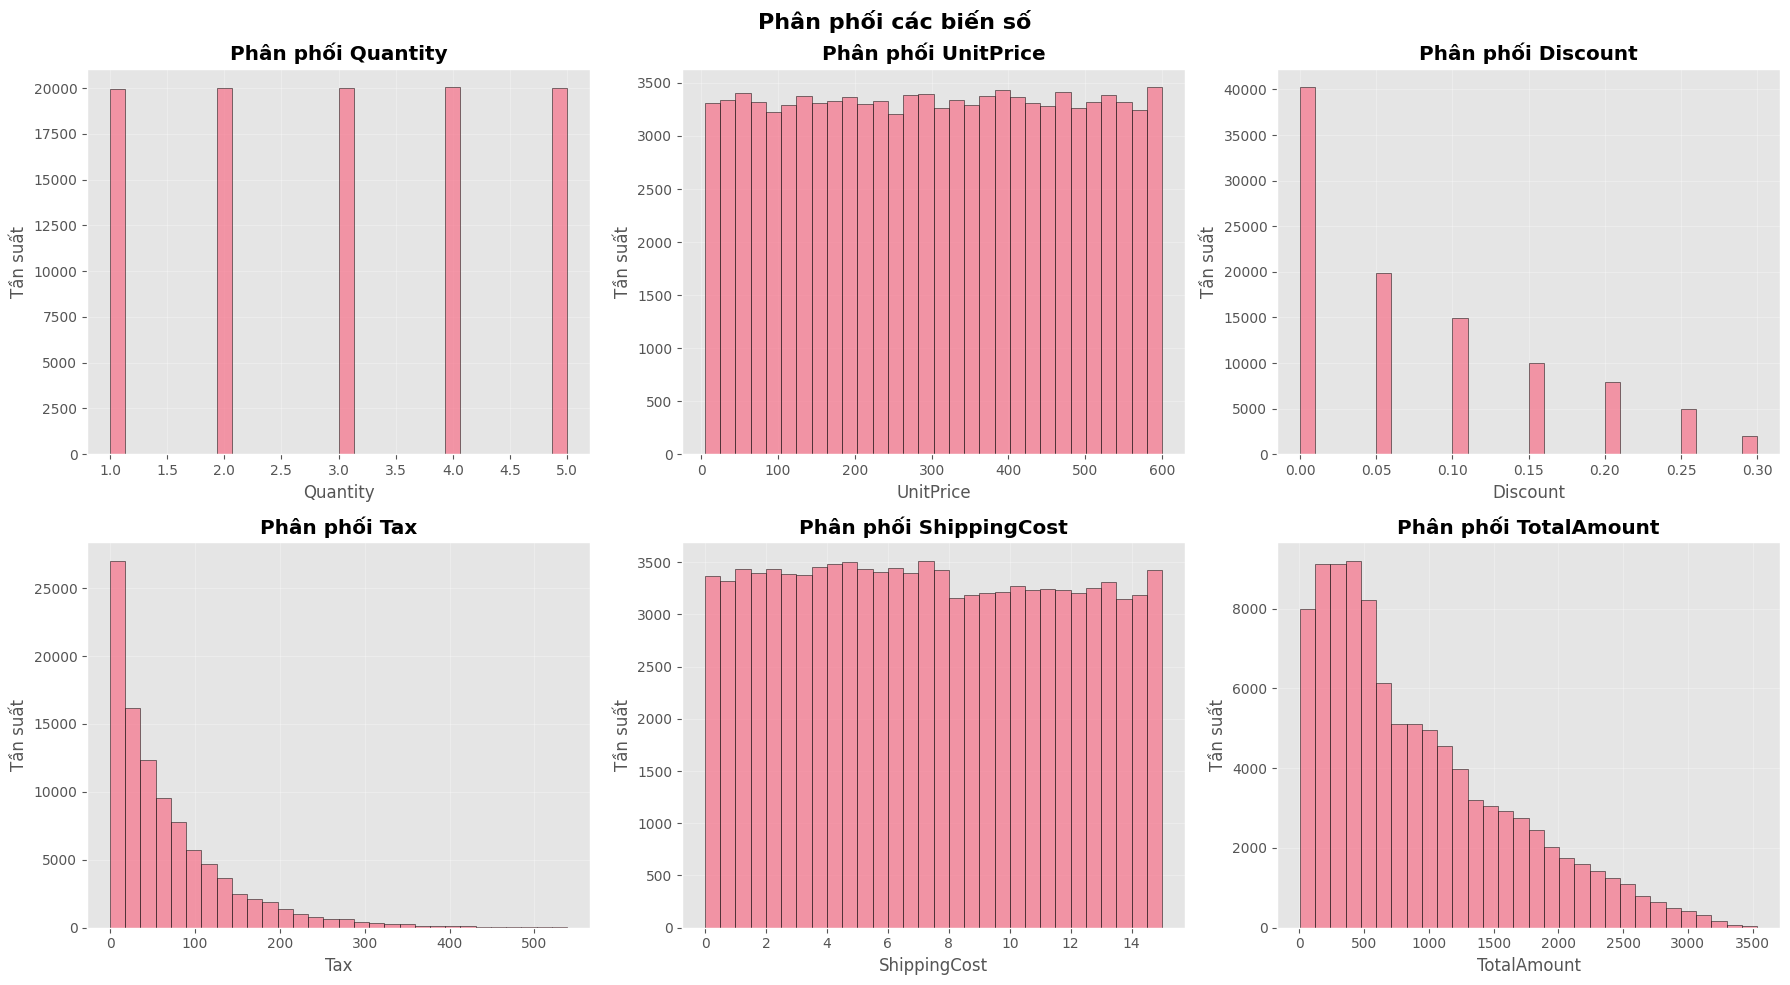

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Phân phối các biến số', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_cols):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Phân phối {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Tần suất')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2. Phân tích mối tương quan giữa các biến số để xác định các mối quan hệ tuyến tính và phát hiện các biến có tương quan cao.

In [5]:
correlation_matrix = df[numeric_cols].corr()
correlation_matrix

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
Quantity,1.000000,0.004408,-0.000398,0.437884,0.020047,0.594928
UnitPrice,0.004408,1.000000,0.006159,0.526856,0.045773,0.715808
Discount,-0.000398,0.006159,1.000000,-0.077550,0.000315,-0.108088
Tax,0.437884,0.526856,-0.077550,1.000000,0.023498,0.779399
ShippingCost,0.020047,0.045773,0.000315,0.023498,1.000000,0.039349
TotalAmount,0.594928,0.715808,-0.108088,0.779399,0.039349,1.000000


### 3. So sánh các chỉ số trung bình (doanh thu, số lượng, giá) theo từng danh mục sản phẩm để xác định danh mục nào có hiệu suất tốt nhất.

In [6]:
category_stats = df.groupby('Category').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean',
    'UnitPrice': 'mean'
}).round(2)
category_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB', 'Giá TB']
category_stats = category_stats.sort_values('Tổng doanh thu', ascending=False)
category_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB,Giá TB
Category,,,,,
Electronics,924.71,15584217.67,16853,3.01,302.93
Sports & Outdoors,913.21,15345572.12,16804,3.01,301.76
Books,911.05,15261837.43,16752,2.98,302.02
Clothing,927.88,15253398.33,16439,3.01,305.20
Toys & Games,919.88,15216685.28,16542,3.01,302.81
Home & Kitchen,912.94,15163939.16,16610,2.99,302.76


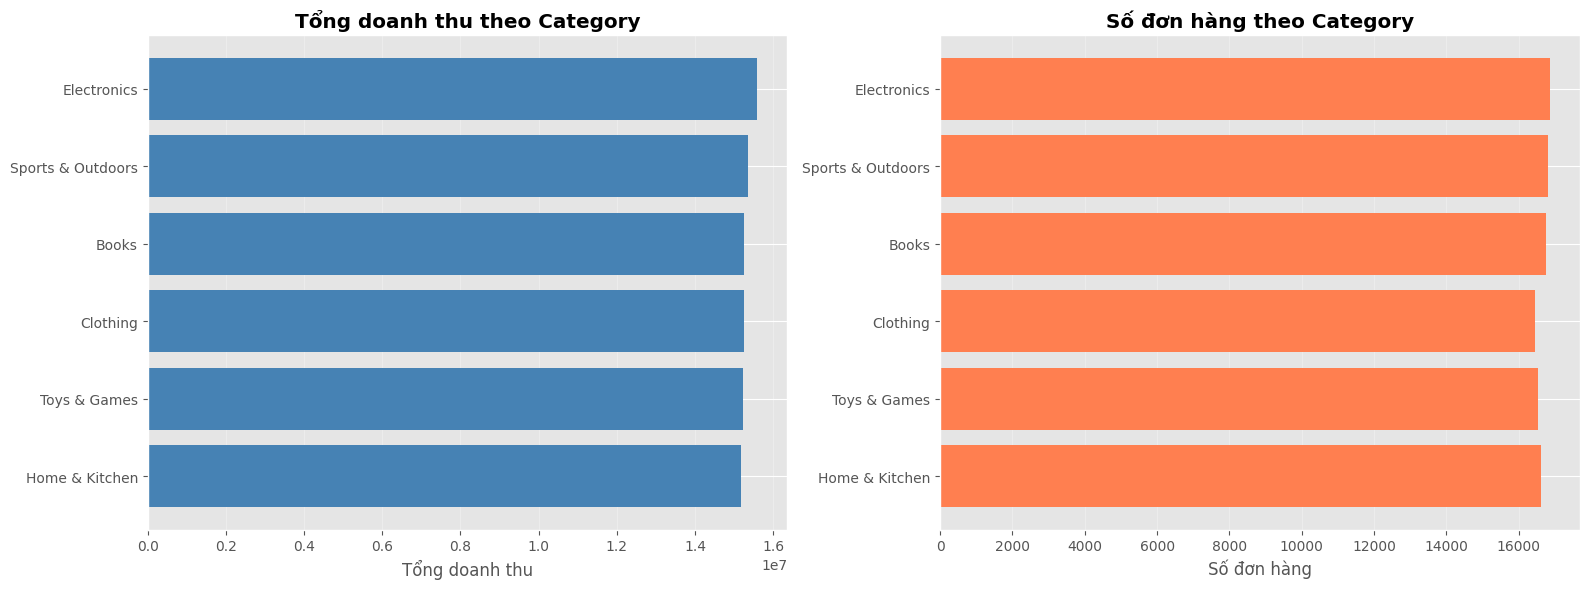

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(category_stats.index, category_stats['Tổng doanh thu'], color='steelblue')
axes[0].set_title('Tổng doanh thu theo Category', fontweight='bold')
axes[0].set_xlabel('Tổng doanh thu')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(category_stats.index, category_stats['Số đơn hàng'], color='coral')
axes[1].set_title('Số đơn hàng theo Category', fontweight='bold')
axes[1].set_xlabel('Số đơn hàng')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 4. So sánh hiệu suất bán hàng giữa các quốc gia để xác định thị trường nào đóng góp nhiều nhất vào doanh thu.

In [8]:
country_stats = df.groupby('Country').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean'
}).round(2)
country_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB']
country_stats = country_stats.sort_values('Tổng doanh thu', ascending=False)
country_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB
Country,,,,
United States,917.95,64310050.64,70058,3.00
India,921.92,13875838.99,15051,3.00
Canada,915.05,5323757.03,5818,2.99
United Kingdom,915.82,4526896.86,4943,3.00
Australia,917.46,3789106.45,4130,3.01


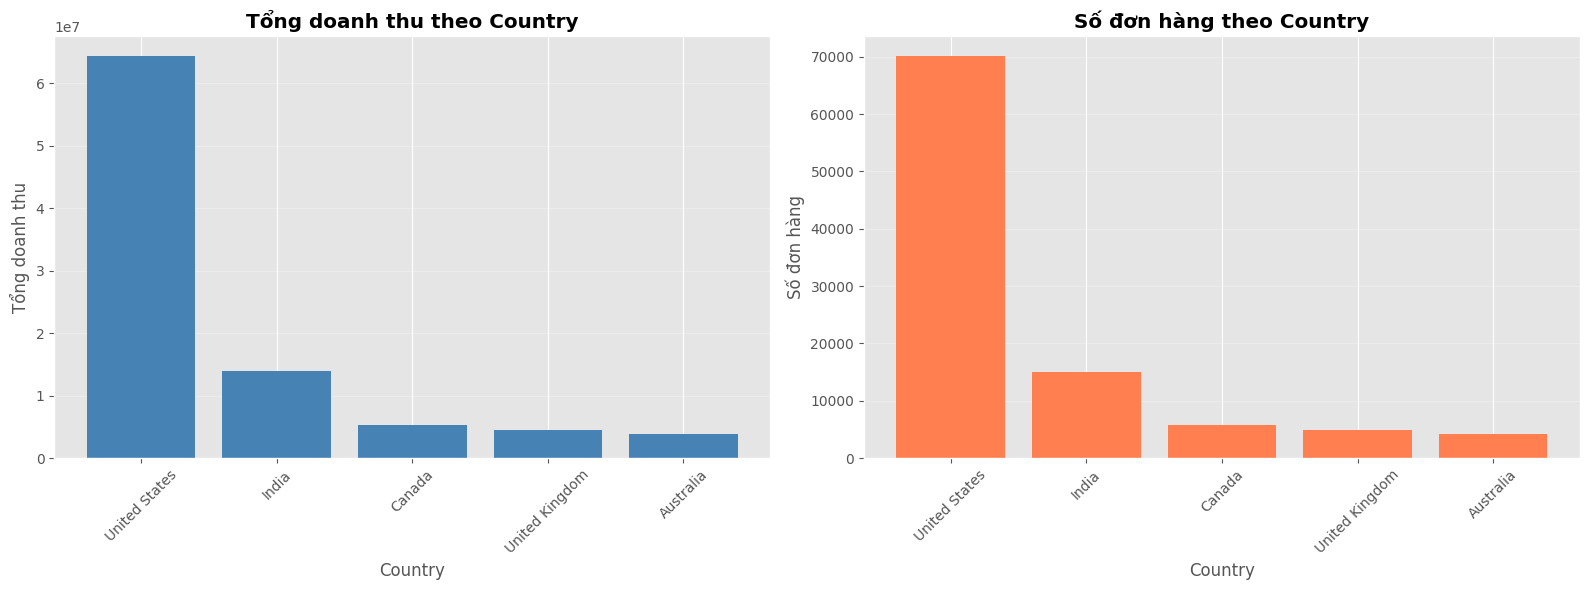

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(country_stats.index, country_stats['Tổng doanh thu'], color='steelblue')
axes[0].set_title('Tổng doanh thu theo Country', fontweight='bold')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Tổng doanh thu')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(country_stats.index, country_stats['Số đơn hàng'], color='coral')
axes[1].set_title('Số đơn hàng theo Country', fontweight='bold')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Số đơn hàng')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 5. OrderStatus

Phân tích tỷ lệ các trạng thái đơn hàng để đánh giá hiệu quả xử lý đơn hàng và tỷ lệ hủy/trả hàng.

In [10]:
status_counts = df['OrderStatus'].value_counts()
status_percentage = (df['OrderStatus'].value_counts(normalize=True) * 100).round(2)
status_df = pd.DataFrame({
    'Số lượng': status_counts,
    'Tỷ lệ (%)': status_percentage
})
status_df

,Số lượng,Tỷ lệ (%)
OrderStatus,,
Delivered,74628,74.63
Shipped,15192,15.19
Pending,4103,4.10
Returned,3049,3.05
Cancelled,3028,3.03


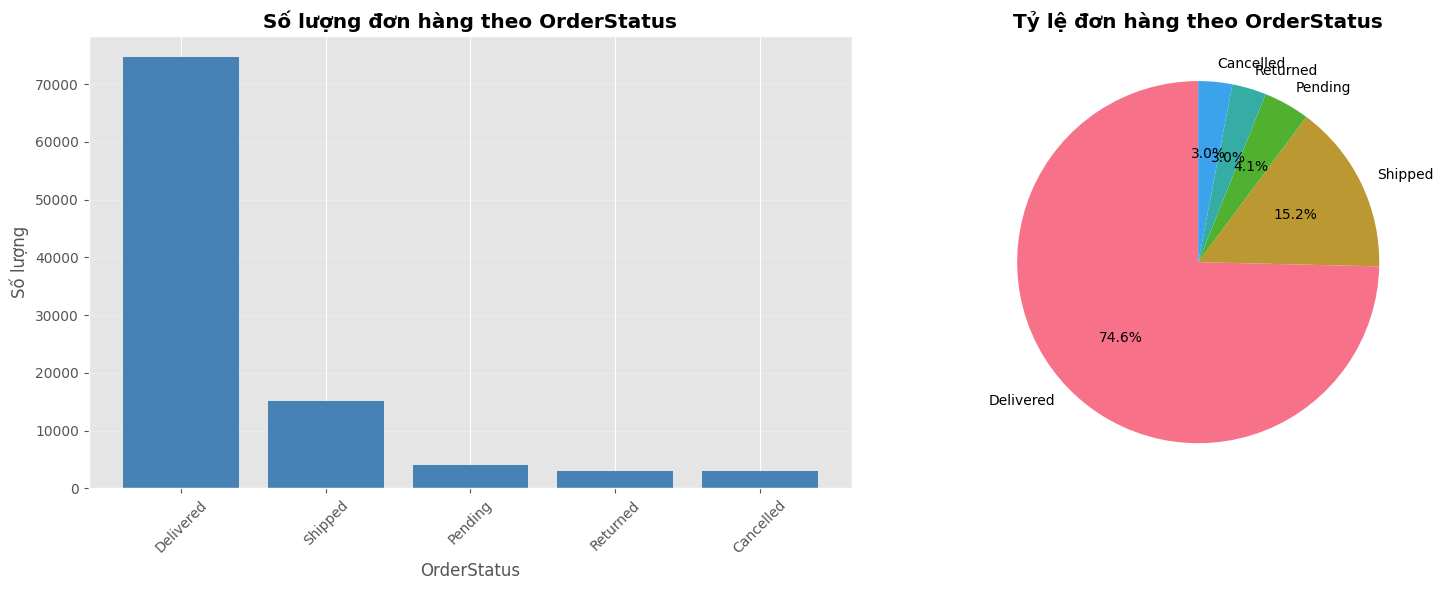

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(status_df.index, status_df['Số lượng'], color='steelblue')
axes[0].set_title('Số lượng đơn hàng theo OrderStatus', fontweight='bold')
axes[0].set_xlabel('OrderStatus')
axes[0].set_ylabel('Số lượng')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].pie(status_df['Số lượng'], labels=status_df.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Tỷ lệ đơn hàng theo OrderStatus', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
payment_stats = df.groupby('PaymentMethod').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean'
}).round(2)
payment_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB']
payment_stats = payment_stats.sort_values('Tổng doanh thu', ascending=False)
payment_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB
PaymentMethod,,,,
Credit Card,916.78,32122158.71,35038,3.00
Debit Card,925.82,18538679.42,20024,3.01
Upi,922.34,13896029.03,15066,3.00
Amazon Pay,912.13,13697498.41,15017,3.00
Net Banking,912.23,9055674.86,9927,2.99
Cash On Delivery,916.32,4515609.54,4928,3.01


## 7. Phân tích theo thời gian

Phân tích xu hướng doanh thu và số lượng đơn hàng theo thời gian để phát hiện các mùa cao điểm và xu hướng tăng trưởng.

In [14]:
time_stats = df.groupby('Year').agg({
    'TotalAmount': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)
time_stats.columns = ['Tổng doanh thu', 'Doanh thu TB', 'Tổng số lượng']
time_stats

,Tổng doanh thu,Doanh thu TB,Tổng số lượng
Year,,,
2020,18529864.59,923.45,60208
2021,18248575.70,917.47,59641
2022,18367248.59,914.79,60126
2023,18513912.66,921.27,60577
2024,18166048.44,914.25,59588


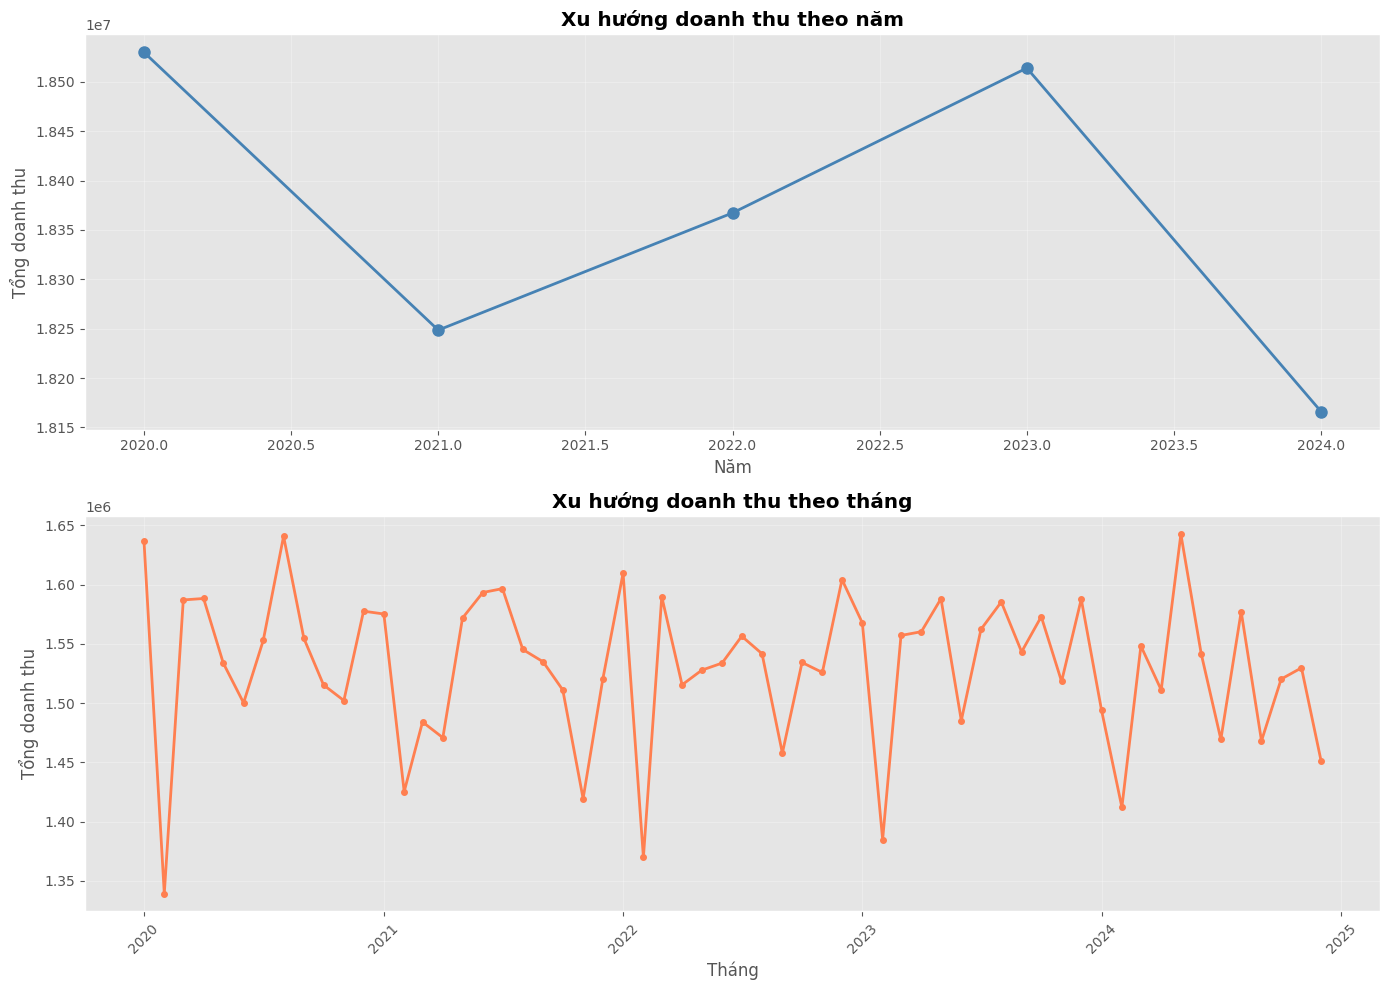

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(time_stats.index, time_stats['Tổng doanh thu'], marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].set_title('Xu hướng doanh thu theo năm', fontweight='bold')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Tổng doanh thu')
axes[0].grid(True, alpha=0.3)

monthly_stats = df.groupby(['Year', 'Month']).agg({'TotalAmount': 'sum'}).reset_index()
monthly_stats['Date'] = pd.to_datetime(monthly_stats[['Year', 'Month']].assign(Day=1))
monthly_stats = monthly_stats.sort_values('Date')

axes[1].plot(monthly_stats['Date'], monthly_stats['TotalAmount'], marker='o', linewidth=2, markersize=4, color='coral')
axes[1].set_title('Xu hướng doanh thu theo tháng', fontweight='bold')
axes[1].set_xlabel('Tháng')
axes[1].set_ylabel('Tổng doanh thu')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6. Discount và TotalAmount

Phân tích mối quan hệ giữa mức giảm giá và doanh thu để đánh giá hiệu quả của các chương trình khuyến mãi.

In [16]:
discount_analysis = df.groupby(pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.3, 1])).agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean'
}).round(2)
discount_analysis.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB']
discount_analysis

C:\Users\MINHKHOI-X1G10\AppData\Local\Temp\ipykernel_1348\1277938575.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby(pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.3, 1])).agg({


,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB
Discount,,,,
"(0.0, 0.05]",942.95,18754251.86,19889,3.00
"(0.05, 0.1]",898.12,13391000.00,14910,3.00
"(0.1, 0.15]",841.71,8451571.92,10041,3.00
"(0.15, 0.2]",793.68,6301022.37,7939,2.99
"(0.2, 0.3]",741.00,5168499.51,6975,3.01
"(0.3, 1.0]",NaN,0.00,0,NaN


C:\Users\MINHKHOI-X1G10\AppData\Local\Temp\ipykernel_1348\725092043.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_grouped = df.groupby(discount_bins)['TotalAmount'].mean()


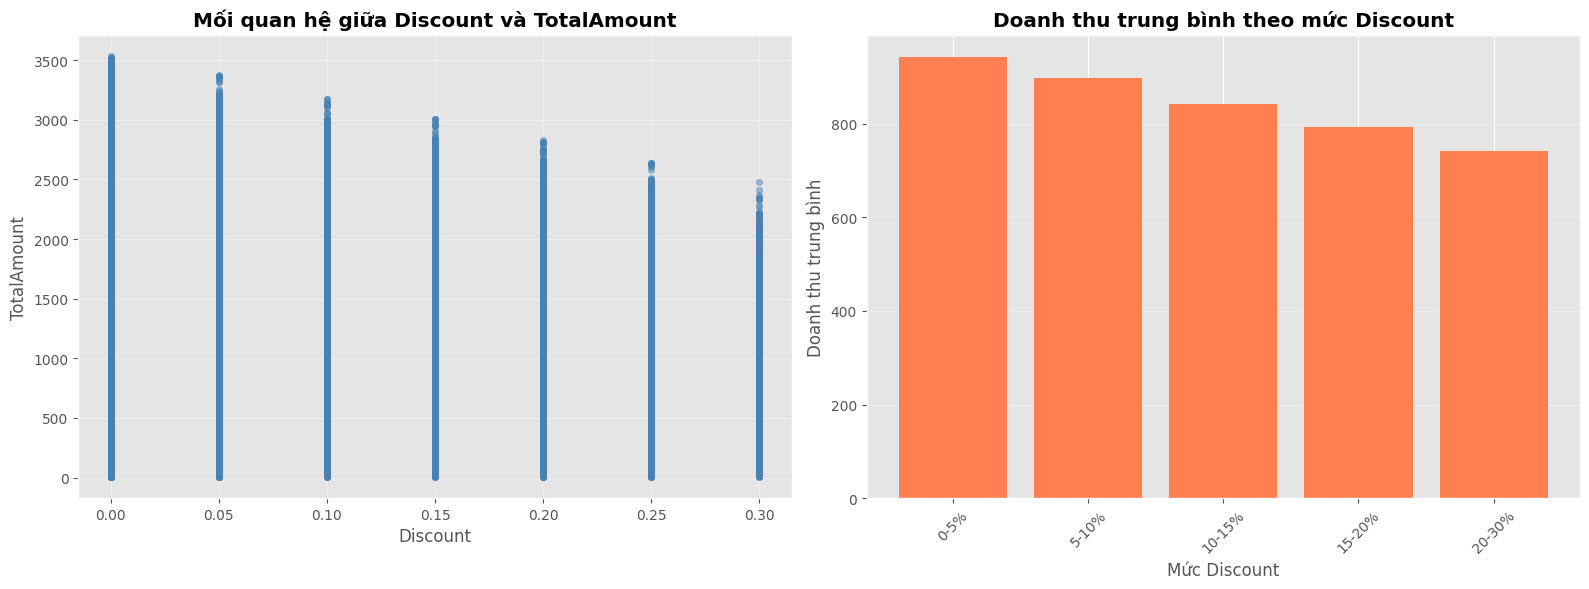

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['Discount'], df['TotalAmount'], alpha=0.5, s=20, color='steelblue')
axes[0].set_title('Mối quan hệ giữa Discount và TotalAmount', fontweight='bold')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('TotalAmount')
axes[0].grid(True, alpha=0.3)

discount_bins = pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.3, 1], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-30%', '30%+'])
discount_grouped = df.groupby(discount_bins)['TotalAmount'].mean()

axes[1].bar(discount_grouped.index.astype(str), discount_grouped.values, color='coral')
axes[1].set_title('Doanh thu trung bình theo mức Discount', fontweight='bold')
axes[1].set_xlabel('Mức Discount')
axes[1].set_ylabel('Doanh thu trung bình')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 7. So sánh hiệu suất của các thương hiệu để xác định các brand phổ biến nhất và có doanh thu cao nhất.

In [18]:
brand_stats = df.groupby('Brand').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'UnitPrice': 'mean',
    'Quantity': 'mean'
}).round(2)
brand_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Giá TB', 'Số lượng TB']
brand_stats = brand_stats.sort_values('Tổng doanh thu', ascending=False).head(10)
brand_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Giá TB,Số lượng TB
Brand,,,,,
Coretech,922.65,9343721.12,10127,302.66,3.00
Kiddofun,925.35,9324749.86,10077,302.93,2.99
Readmore,909.29,9278406.74,10204,301.70,2.98
Urbanstyle,938.61,9249027.55,9854,304.78,3.06
Zenith,924.92,9239960.63,9990,305.00,3.01
Apex,920.56,9147605.13,9937,302.64,3.01
Nexpro,911.35,9078825.04,9962,302.16,2.99
Fitlife,893.02,9061444.75,10147,299.43,2.97
Brightlux,914.18,9056816.10,9907,303.49,2.99


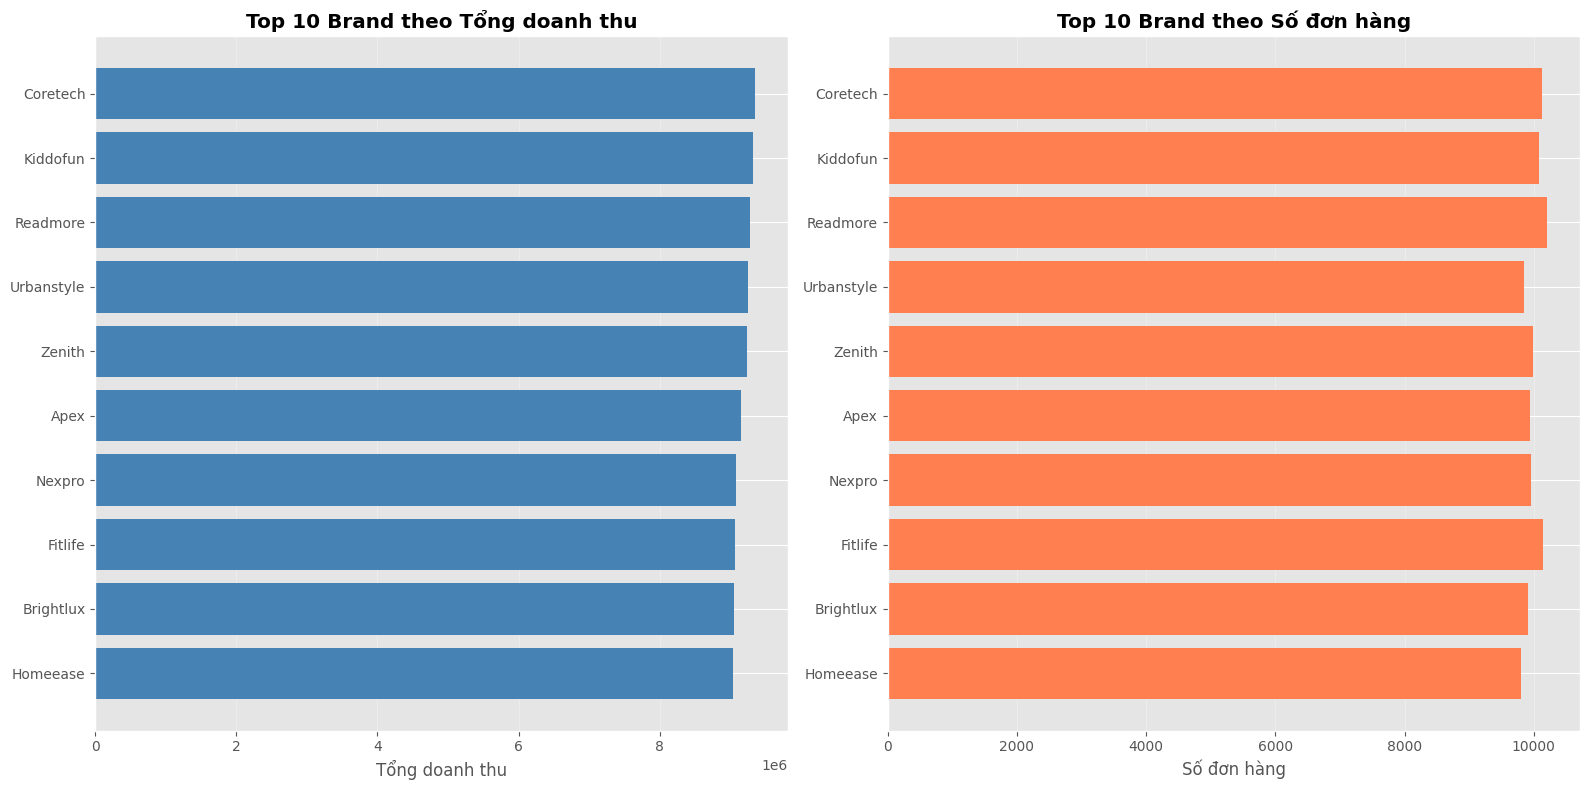

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].barh(brand_stats.index, brand_stats['Tổng doanh thu'], color='steelblue')
axes[0].set_title('Top 10 Brand theo Tổng doanh thu', fontweight='bold')
axes[0].set_xlabel('Tổng doanh thu')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(brand_stats.index, brand_stats['Số đơn hàng'], color='coral')
axes[1].set_title('Top 10 Brand theo Số đơn hàng', fontweight='bold')
axes[1].set_xlabel('Số đơn hàng')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 10. Phân tích sự kết hợp giữa Category và Country để xác định danh mục sản phẩm nào phổ biến ở quốc gia nào.

In [20]:
category_country = df.groupby(['Category', 'Country']).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum'
}).round(2)
category_country = category_country.sort_values('TotalAmount', ascending=False).head(15)
category_country

,,TotalAmount,Quantity
Category,Country,,
Electronics,United States,10890040.84,35413
Sports & Outdoors,United States,10722996.23,35255
Home & Kitchen,United States,10699553.34,35011
Clothing,United States,10677554.76,34806
Books,United States,10667919.14,35032
Toys & Games,United States,10651986.32,34892
Sports & Outdoors,India,2345959.66,7723
Electronics,India,2345341.24,7622
Toys & Games,India,2321989.21,7500


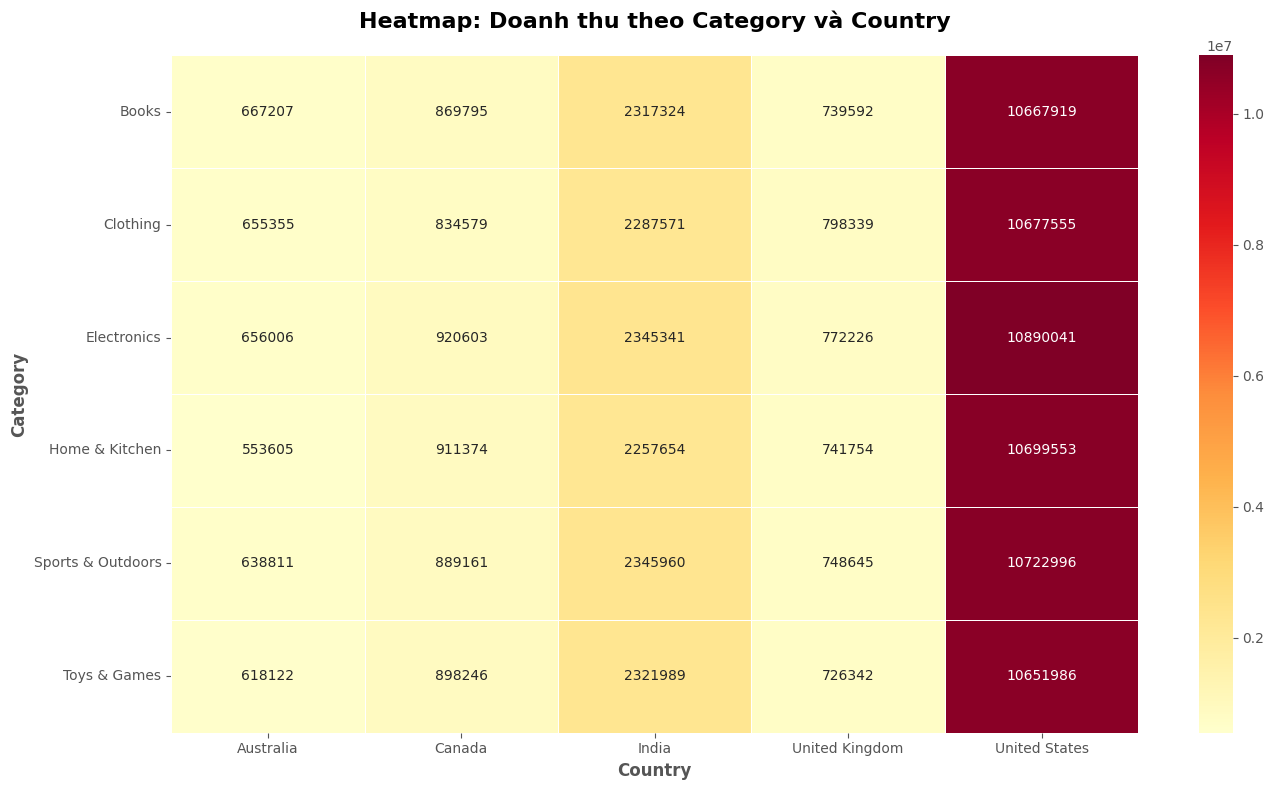

In [21]:
pivot_data = df.groupby(['Category', 'Country'])['TotalAmount'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap: Doanh thu theo Category và Country', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Category', fontweight='bold')
plt.tight_layout()
plt.show()

## Tổng kết

Qua phân tích EDA, các phát hiện chính:

1. **Phân phối dữ liệu**: Các biến số có phân phối khác nhau, cần lưu ý khi xây dựng model
2. **Tương quan**: Các biến có mối tương quan với nhau, đặc biệt là TotalAmount với các biến thành phần
3. **Category**: Một số danh mục có doanh thu và số đơn hàng cao hơn đáng kể
4. **Country**: Có sự khác biệt về hiệu suất bán hàng giữa các quốc gia
5. **OrderStatus**: Tỷ lệ đơn hàng thành công cao, nhưng cần theo dõi tỷ lệ hủy/trả hàng
6. **PaymentMethod**: Các phương thức thanh toán khác nhau có mức độ sử dụng và doanh thu khác nhau
7. **Xu hướng thời gian**: Có thể phát hiện các mùa cao điểm và xu hướng tăng trưởng
8. **Discount**: Mối quan hệ giữa discount và doanh thu cần được phân tích kỹ để tối ưu chiến lược khuyến mãi